# 1. Introduction

    The dataset got provided by Maybank.
    This notebook is to analyse the dataset and show my findings.
    
    Author: Johannes Brandau

In [101]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_palette('pastel')

from string import ascii_letters

import matplotlib.pyplot as plt
import zipcodes as zcode

## 2. Read and label the data

In [102]:
# Read the file
df_data = pd.read_excel('DS_assessment.xlsx',sheet_name='Data', index_col='ID')

In [103]:
# Label columns manually 

df_data.loc[df_data['InternetBanking'] == 'YES', 'InternetBanking'] = 1
df_data.loc[df_data['InternetBanking'] == 'NO', 'InternetBanking'] = 0 

df_data.loc[df_data['Personal Loan'] == 'YES', 'Personal Loan'] = 1
df_data.loc[df_data['Personal Loan'] == 'NO', 'Personal Loan'] = 0 

df_data.loc[df_data['Education'] == 'Undergrad', 'Education'] = 0
df_data.loc[df_data['Education'] == 'Graduate', 'Education'] = 1
df_data.loc[df_data['Education'] == 'Advanced Degree', 'Education'] = 2 

df_data['InternetBanking']=df_data['InternetBanking'].astype('int')
df_data['Personal Loan']=df_data['Personal Loan'].astype('int')
df_data['Education']=df_data['Education'].astype('int')

## 3. Basic checks

In [104]:
df_data.describe()

Age   Experience       Income   Postal Code  Family Size  \
count  5000.000000  5000.000000  4980.000000   5000.000000  4991.000000   
mean     45.338400    20.104600    73.840361  93152.503000     2.396714   
std      11.463166    11.467954    46.079300   2121.852197     1.148189   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

       CCAvgSpending    Education     Mortgage  Investment Account  \
count    5000.000000  5000.000000  5000.000000         5000.000000   
mean        1.937938     0.881000    56.498800            0.104400   
std         1.747659     0.839869   101.713802            0.305809   
min         0.000000     0.000000     0.000000            0.000000   
25%         0.700000     0.000000     0.000000            0.000000   
50%         1.500000     1.000000     0.000000            0.000000   
75%         2.500000     2.000000   101.000000            0.000000   
max        10.000000     2.000000   635.000000            1.000000   

       Deposit Account  InternetBanking  Personal Loan  
count       5000.00000      5000.000000    5000.000000  
mean           0.06040         0.596800       0.096000  
std            0.23825         0.490589       0.294621  
min            0.00000         0.000000       0.000000  
25%            0.00000         0.000000       0.000000  
50%            0.00000         1.000000       0.000000  
75%            0.00000         1.000000       0.000000  
max            1.00000         1.000000       1.000000

### Unique values 

In [105]:
df_data.nunique()

Age                    45
Experience             47
Income                162
Postal Code           467
Family Size             4
CCAvgSpending         108
Education               3
Mortgage              347
Investment Account      2
Deposit Account         2
InternetBanking         2
Personal Loan           2
dtype: int64

In [106]:
df_data.nunique().plot(kind='barh')

<AxesSubplot:>

### Plausibility checks

In [107]:
# Check if experience might be huger than the age

len(df_data[df_data['Age'] < df_data['Experience']])

0

In [108]:
# Check if the experience is negative 

len(df_data[df_data['Experience'] < 0])

52

In [109]:
# Check customers under 18 years 

len(df_data[df_data['Age'] < 18])

0

In [110]:
# Check negative income 

len(df_data[df_data['Income'] < 0])

0

### Check columns with empty values 

In [111]:
df_data.isnull().any()

Age                   False
Experience            False
Income                 True
Postal Code           False
Family Size            True
CCAvgSpending         False
Education             False
Mortgage              False
Investment Account    False
Deposit Account       False
InternetBanking       False
Personal Loan         False
dtype: bool

Summary/Observation: Colums Income and Family Size has empty values 

### Check falmily sizes empty 

In [112]:
df_data[df_data['Family Size'].isnull()]

Age  Experience  Income  Postal Code  Family Size  CCAvgSpending  \
ID                                                                       
786    46          22   164.0        94122          NaN            7.6   
1212   61          36   131.0        92407          NaN            0.9   
1221   41          17   165.0        94143          NaN            8.0   
1489   38          12    39.0        95825          NaN            0.3   
2347   52          26    59.0        92660          NaN            1.5   
2877   24          -2    80.0        91107          NaN            1.6   
3121   35          11    75.0        94542          NaN            1.7   
4122   53          27    65.0        91711          NaN            2.8   
4622   57          32    60.0        93407          NaN            1.7   

      Education  Mortgage  Investment Account  Deposit Account  \
ID                                                               
786           0         0                   0                1   
1212          0         0                   0                0   
1221          0         0                   0                0   
1489          0       174                   0                0   
2347          1       239                   0                0   
2877          2       238                   0                0   
3121          1         0                   0                0   
4122          1         0                   0                0   
4622          0         0                   1                1   

      InternetBanking  Personal Loan  
ID                                    
786                 1              0  
1212                1              0  
1221                1              0  
1489                1              0  
2347                0              0  
2877                0              0  
3121                1              0  
4122                0              0  
4622                1              0

In [113]:
# Family size is unknown and rows are not significant -> drop columns 
df_data.drop(df_data[df_data['Family Size'].isnull()].index, inplace=True)

Summary/Observation: Some values of the family size are empty, these columns can get removed.

### Check correlation

In [114]:
# Compute the correlation matrix
corr = df_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

Summary/Observation: 
- Income, Average Spending and Deposit Account have a high correlation to the Personal Loan.
- Education and Mortgage has a slightly huger correlation to the Personal Loan.

## 3. Data analysis by column

### Helper functions

In [116]:
# Function plots for univariate analysis of outliers, average, median 
def univariate_analysis_plot(data):  
    Name=data.name
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    
    sns.set_palette('pastel')
    fig.suptitle(f"Boxplot of the column {Name}", fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
   
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data,kde=False,ax=ax_dis)
    
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [117]:
# Function to plot analysis for categorical values
def categorical_plot(df,column,title):
    
    plt.figure(figsize=(5,4))

    sns.set_theme(style="white")
   
    plt.subplot()
    order = df[column].value_counts(ascending=False).index   
    sns.set_palette('pastel')
    ax=sns.countplot(x=df[column], data=df )
    sns.despine(top=True,right=True,left=True)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[column]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title)

## Column: Personal Loan

In [118]:
df_data['Personal Loan'].describe()

count    4991.000000
mean        0.096173
std         0.294858
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

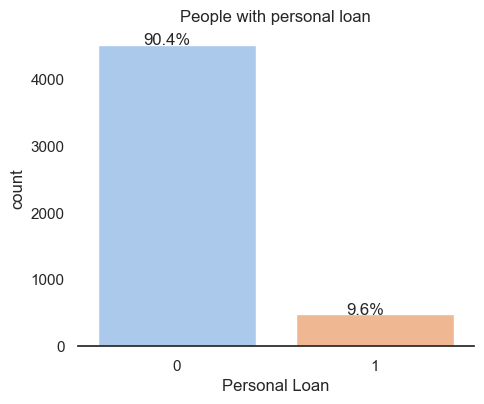

In [119]:
categorical_plot(df_data,'Personal Loan', 'People with personal loan')

Summary/Observation: Personal Loan is imbalanced, less customers (9.7%) has a loan instead 90.3% has no loan.

## Column: Age 

In [120]:
df_data['Age'].describe()

count    4991.000000
mean       45.338609
std        11.463716
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

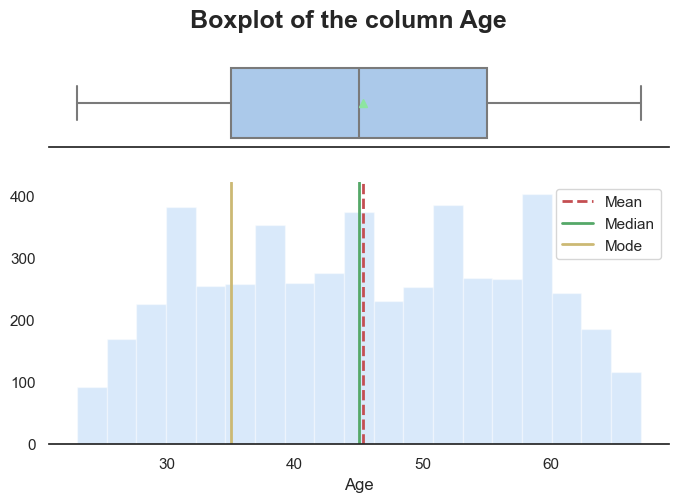

In [121]:
univariate_analysis_plot(df_data['Age'])

In [122]:
df_data['Age'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

In [123]:
df_data[df_data['Age'] < 18].head()

Empty DataFrame
Columns: [Age, Experience, Income, Postal Code, Family Size, CCAvgSpending, Education, Mortgage, Investment Account, Deposit Account, InternetBanking, Personal Loan]
Index: []

In [124]:
# Delete values with customers under 18, some rows have 0 as age. 

df_data = df_data[df_data['Age'] >= 18]

Summary/Observation: No important observations, in some rows the customers age is 0 this rows got deleted

## Column: Experience

In [125]:
df_data['Experience'].describe()

count    4991.000000
mean       20.104588
std        11.468449
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [126]:
# Show negative experience

df_data[df_data['Experience'] < 0].head(15)

Age  Experience  Income  Postal Code  Family Size  CCAvgSpending  \
ID                                                                      
90    25          -1   113.0        94303          4.0           2.30   
227   24          -1    39.0        94085          2.0           1.70   
316   24          -2    51.0        90630          3.0           0.30   
452   28          -2    48.0        94132          2.0           1.75   
525   24          -1    75.0        93014          4.0           0.20   
537   25          -1    43.0        92173          3.0           2.40   
541   25          -1   109.0        94010          4.0           2.30   
577   25          -1    48.0        92870          3.0           0.30   
584   24          -1    38.0        95045          2.0           1.70   
598   24          -2   125.0        92835          2.0           7.20   
650   25          -1    82.0        92677          4.0           2.10   
671   23          -1    61.0        92374          4.0           2.60   
687   24          -1    38.0        92612          4.0           0.60   
794   24          -2   150.0        94720          2.0           2.00   
890   24          -2    82.0        91103          2.0           1.60   

     Education  Mortgage  Investment Account  Deposit Account  \
ID                                                              
90           2         0                   0                0   
227          1         0                   0                0   
316          2         0                   0                0   
452          2        89                   0                0   
525          0         0                   0                0   
537          1       176                   0                0   
541          2       314                   0                0   
577          2         0                   0                0   
584          1         0                   0                0   
598          0         0                   1                0   
650          2         0                   0                0   
671          0       239                   0                0   
687          1         0                   0                0   
794          0         0                   0                0   
890          2         0                   0                0   

     InternetBanking  Personal Loan  
ID                                   
90                 0              0  
227                0              0  
316                1              0  
452                1              0  
525                1              0  
537                1              0  
541                1              0  
577                0              0  
584                1              0  
598                0              0  
650                1              0  
671                1              0  
687                1              0  
794                1              0  
890                1              0

In [127]:
# Drop rows with negative experience 
df_data.drop(df_data[df_data['Experience'] < 0].index, inplace=True)

In [128]:
df_data['Experience'].describe()

count    4940.000000
mean       20.326923
std        11.315507
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [129]:
df_data.loc[df_data['Income'].isnull(),'Income'] = 0

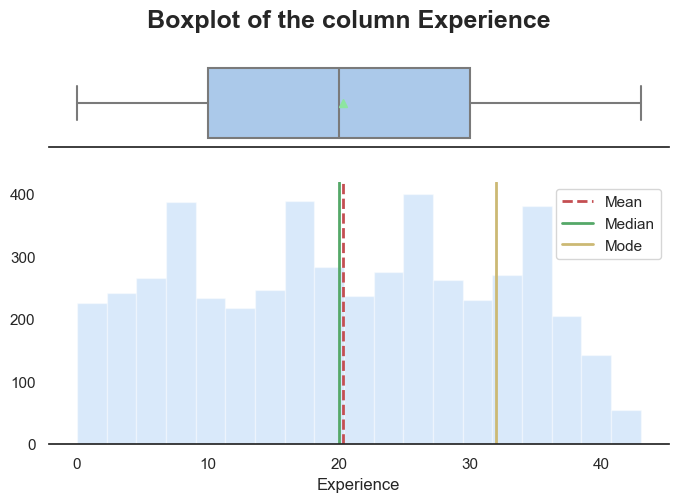

In [130]:
univariate_analysis_plot(df_data['Experience'])

<AxesSubplot:>

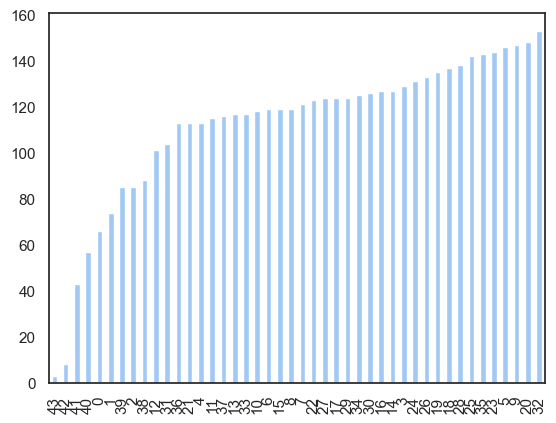

In [131]:
df_data['Experience'].value_counts().sort_values().plot.bar()

<AxesSubplot:>

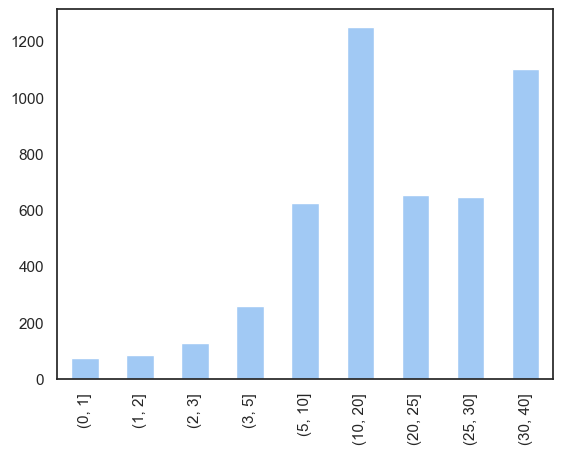

In [132]:
bins = [0, 1, 2, 3, 5, 10, 20, 25, 30, 40]
pd.cut(df_data['Experience'], bins=bins).value_counts(sort=False).plot.bar()

Summary/Observation: No important observations, in some rows customers had negative experience, replaced with 0

## Column: Income

In [133]:
df_data['Income'].describe()

count    4940.000000
mean       73.548583
std        46.293856
min         0.000000
25%        38.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [134]:
# Show empty income 

df_data[df_data['Income'].isnull()].head()

Empty DataFrame
Columns: [Age, Experience, Income, Postal Code, Family Size, CCAvgSpending, Education, Mortgage, Investment Account, Deposit Account, InternetBanking, Personal Loan]
Index: []

In [146]:
# Replace nan values with 0, it might be as well possible to delete these rows 
df_data.loc[df_data['Income'].isnull()] = 0

In [136]:
univariate_analysis_plot(df_data['Income'])

<AxesSubplot:>

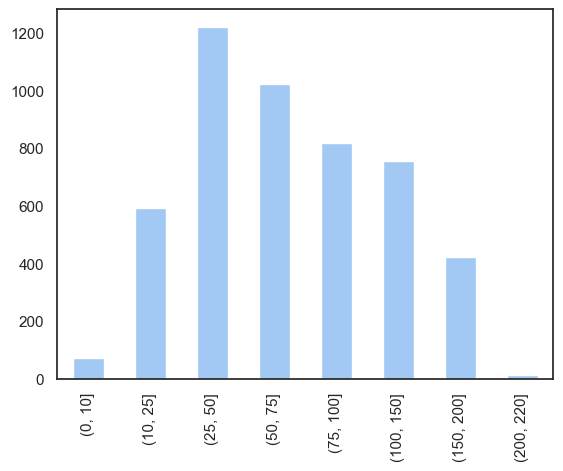

In [137]:
# Binning Income 

bins = [0, 10, 25, 50, 75, 100, 150, 200, 220]
pd.cut(df_data['Income'], bins=bins).value_counts(sort=False).plot.bar()

Summary/Observation: The income has some outliers, mostly are people with a huge income.

## Column: Postal Code	

In [138]:
# Get unique zipcodes
list_zipcode=df_data['Postal Code'].unique()

In [139]:
# Detect zipcodes and get the matching locations
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1:
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [140]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

Postcodes 9307,96651,92634,92717 does not exist and can dropped

In [141]:
# Map the locations to the dataset 
df_data['Location'] =df_data['Postal Code'].map(dict_zip)

In [142]:
# Drop unknown post codes 
for i in [9307,96651,92634,92717]:
    df_data.drop((df_data[df_data['Location']==i].index),inplace=True)

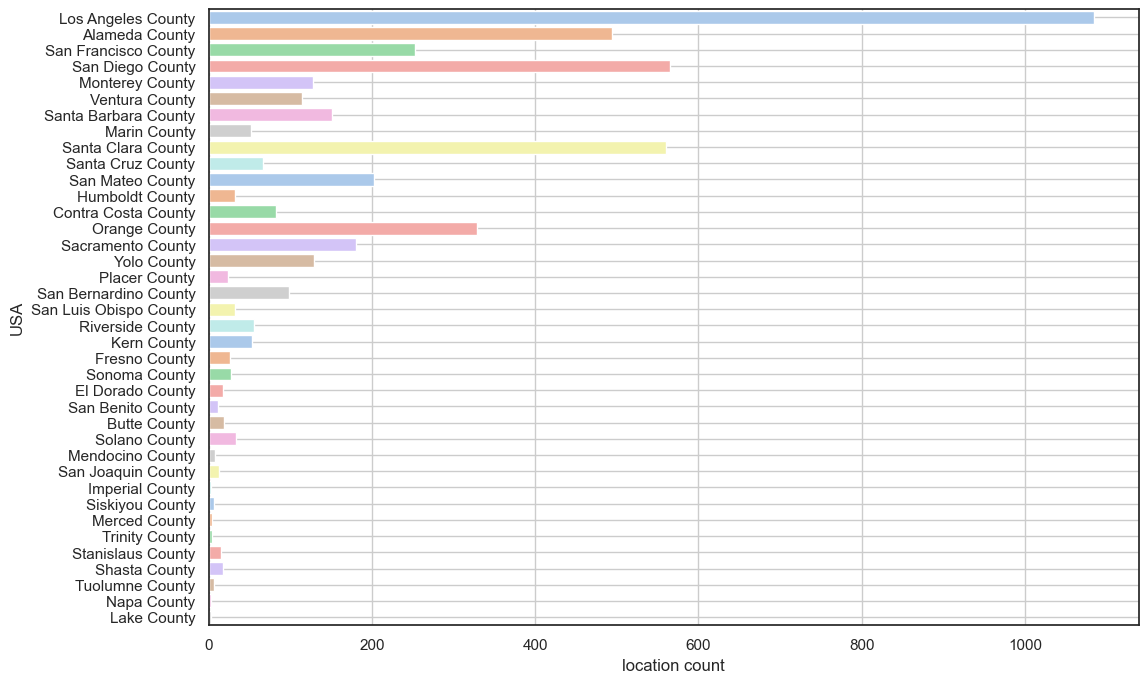

In [147]:
# Plot the counted locations
plt.figure(figsize=(12,8))
sns.countplot(data=df_data,y='Location',palette='pastel')
plt.xlabel('location count')
plt.ylabel('USA')
plt.grid()
plt.show()

In [49]:
# optional: create a mapping table for locations based on the postcode

# from sklearn.preprocessing import LabelEncoder
# df_data['location_encode'] = df_data[['Location']].apply(LabelEncoder().fit_transform)
# df = pd.DataFrame()

# df['Postal Code'] = df_data['Postal Code'].unique()
# df['location'] = df['Postal Code'].map(counties)
# df['location_encode'] = df[['location']].apply(LabelEncoder().fit_transform)
# df.to_csv('location_mapping.csv', index=False)

Summary/Observation: The postcodes are not from Singapore they are from the US. The customers are settled in different cities with huger or lesser frequency  

Idea: It is possible to map the location of a postcode to the dataset

In the US the postcode describes a area, in Singapore the postcode refers to a building or house 

Possible features for Singapore:

- Distance from a postcode to the MRT
- Belongs a postcode to an HDB, condo or landed house

## Column: Family Size

In [50]:
df_data['Family Size'].describe()

count    4907.000000
mean        2.392297
std         1.148727
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family Size, dtype: float64

In [51]:
# Show empty falmily size 

df_data[df_data['Family Size'].isnull()]

Empty DataFrame
Columns: [Age, Experience, Income, Postal Code, Family Size, CCAvgSpending, Education, Mortgage, Investment Account, Deposit Account, InternetBanking, Personal Loan, Location]
Index: []

In [52]:
# Falmily sizes in this rows are unknown and not a significant ammount of rows -> delte rows 
df_data.dropna(inplace=True)

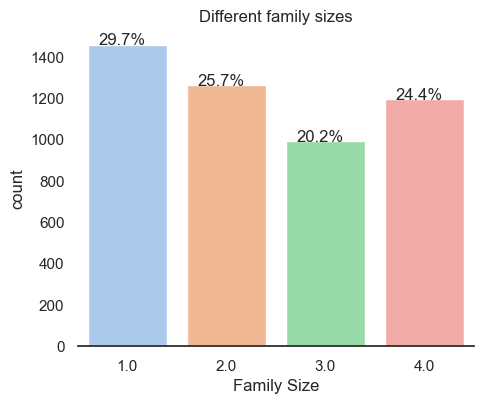

In [53]:
categorical_plot(df_data,'Family Size', 'Different family sizes')

Summary/Observation: No specific observations

## Column: CCAvgSpending

In [54]:
df_data['CCAvgSpending'].describe()

count    4907.000000
mean        1.934214
std         1.742481
min         0.000000
25%         0.700000
50%         1.500000
75%         2.600000
max        10.000000
Name: CCAvgSpending, dtype: float64

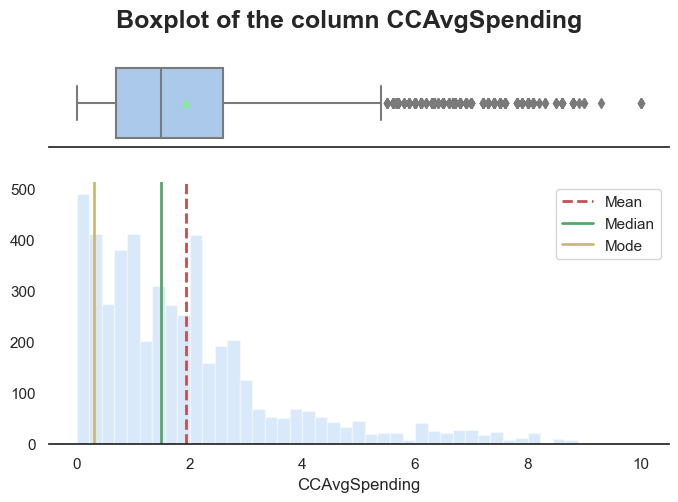

In [55]:
univariate_analysis_plot(df_data['CCAvgSpending'])

<AxesSubplot:>

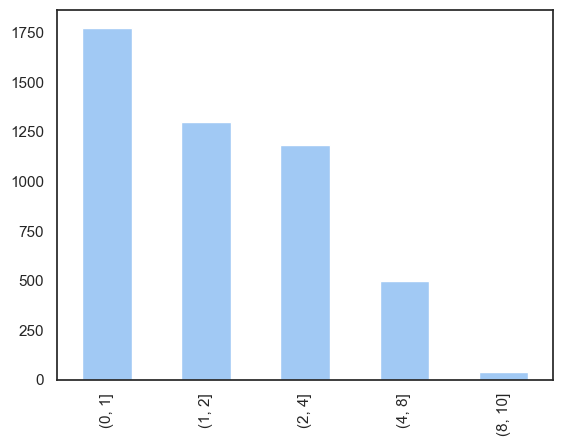

In [56]:
# Binning CCAvgSpending 

bins = [0, 1, 2, 4, 8, 10]
pd.cut(df_data['CCAvgSpending'], bins=bins).value_counts(sort=False).plot.bar()

Summary/Observation: There are some outliers for customers with a higher average sending

## Column Education

In [57]:
df_data['Education'].describe()

count    4907.000000
mean        0.878948
std         0.840294
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Education, dtype: float64

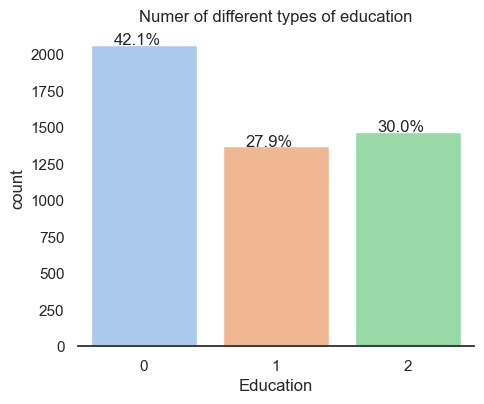

In [58]:
categorical_plot(df_data,'Education', 'Numer of different types of education')

Summary/Observation: 42% of the customers are undergraduate, 27% graduated and 30 have an advanced degree 

## Column: Mortgage

In [59]:
df_data['Mortgage'].describe()

count    4907.000000
mean       56.803954
std       101.992208
min         0.000000
25%         0.000000
50%         0.000000
75%       101.500000
max       635.000000
Name: Mortgage, dtype: float64

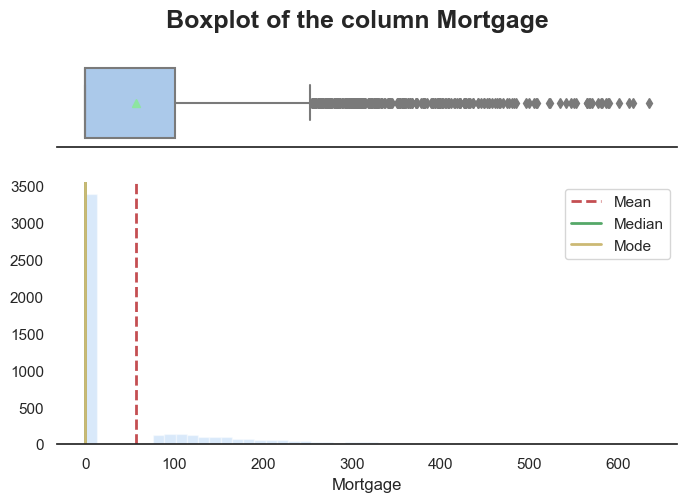

In [60]:
univariate_analysis_plot(df_data['Mortgage'])

Summary/Observation: The mortgage is most of the time 0 and has some outlier

## Column: Investment Account

In [61]:
df_data['Investment Account'].describe()

count    4907.000000
mean        0.104137
std         0.305469
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Investment Account, dtype: float64

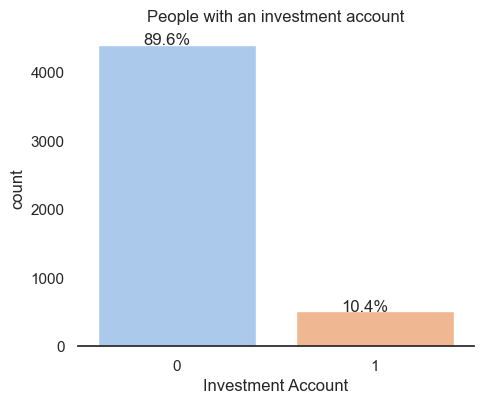

In [62]:
categorical_plot(df_data,'Investment Account', 'People with an investment account')

Summary/Observation: Imbalanced data, 89.6% of the customers do have not an investment account

## Column: Deposit Account

In [63]:
df_data['Deposit Account'].describe()

count    4907.000000
mean        0.061137
std         0.239606
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Deposit Account, dtype: float64

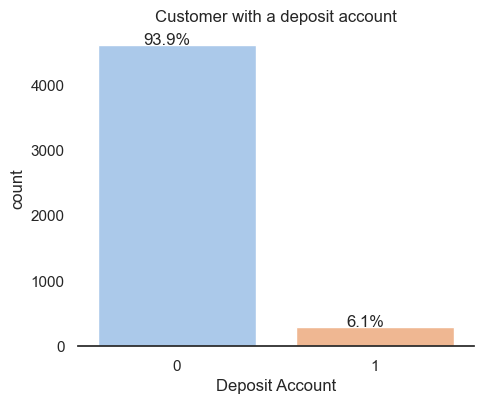

In [64]:
categorical_plot(df_data,'Deposit Account', 'Customer with a deposit account')

Summary/Observation: Imbalanced data, 93.9% of the customers do have not a deposit account

## Column: InternetBanking

In [65]:
df_data['InternetBanking'].describe()

count    4907.000000
mean        0.596902
std         0.490570
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: InternetBanking, dtype: float64

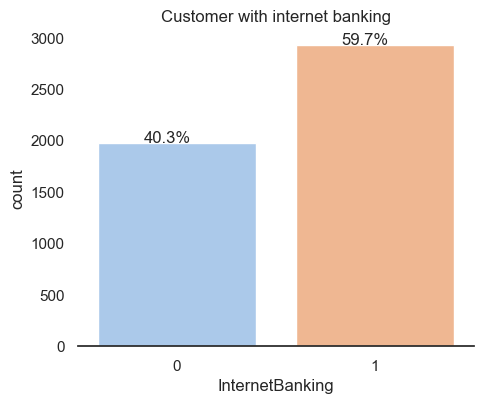

In [66]:
categorical_plot(df_data,'InternetBanking', 'Customer with internet banking')

Summary/Observation: More customers using internet banking

## 4. Advanced analyis  

In [157]:
### Helper Functions

# Plot a distplot and despine graph 
def plot_despite_graph(df,first_column, second_column):
    sns.distplot(df[df[first_column] == 0][second_column] ,label='No')
    sns.distplot(df[df[first_column] == 1][second_column], label='Yes')

    sns.despine(top=True,right=True,left=True)
    plt.legend(loc="center left", title="Personal Loan",bbox_to_anchor=(1,0.75))
    
# Plot a swarm plot
def plot_swarmplot(x,y,hue,df, title):
    
    sns.swarmplot(x=x,y=y,hue=hue,data=df)
    sns.despine(top=True,right=True,left=True) 

    plt.legend(loc="center left", title=title,bbox_to_anchor=(1,0.75))

In [68]:
# Set numerical and categporical columns

numerical_columns=['Age','Income',
                   'CCAvgSpending',
                   'Mortgage',
                   'Experience']

categorical_columns=['Family Size',
                     'Education',
                     'Investment Account',
                     'Deposit Account',
                     'InternetBanking',
                     'Personal Loan']

### Summary of all categorical values

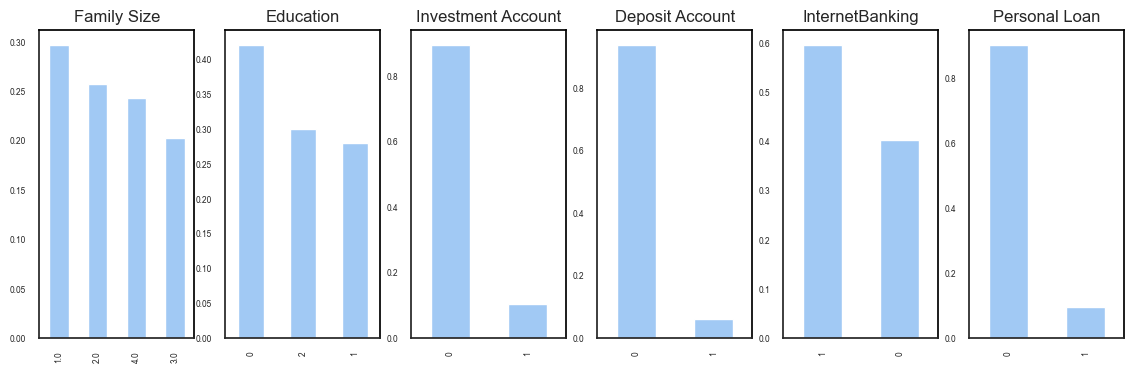

In [69]:
fig, ax = plt.subplots(1,6, figsize=(14,4), dpi=100)
for i,c in enumerate(categorical_columns):
    df_data[c].value_counts(normalize=True).plot(kind='bar',ax=ax[i],title=c,fontsize=6, color='C0')
    ax[i].spines['right'].set_color('black')
    ax[i].spines['top'].set_color('black')

### Anyalse personal loan by education

In [70]:
education_personal_loan = df_data.copy()
education_personal_loan.loc[education_personal_loan['Education'] == 0, 'Education'] = 'Undergrad'
education_personal_loan.loc[education_personal_loan['Education'] == 1, 'Education'] = 'Graduate'
education_personal_loan.loc[education_personal_loan['Education'] == 2, 'Education'] = 'Advanced Degree'
education_personal_loan['count'] = df_data['Personal Loan']
education_personal_loan_group = education_personal_loan.groupby(['Education', 'Personal Loan'],as_index=False)['count'].count()

<AxesSubplot:xlabel='Education', ylabel='count'>

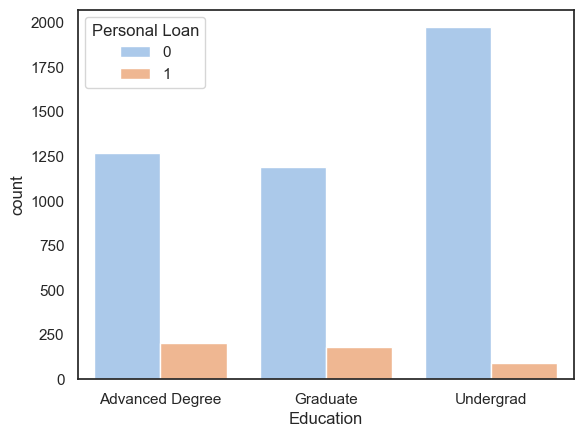

In [71]:
sns.barplot(data=education_personal_loan_group, x='Education', y="count", hue='Personal Loan')

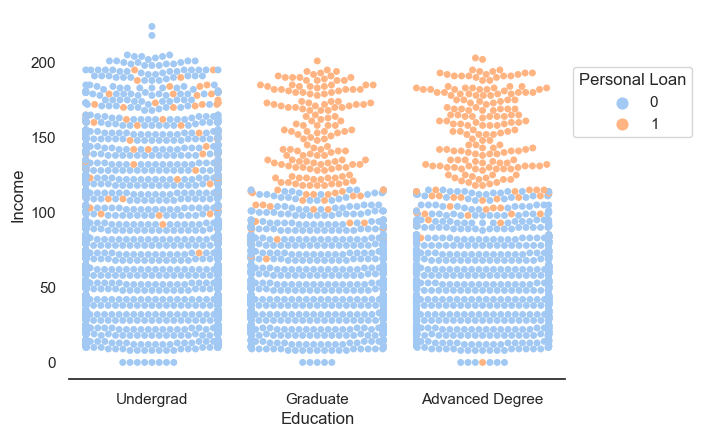

In [72]:
plot_swarmplot('Education','Income','Personal Loan', education_personal_loan, "Personal Loan")

Summary/Observation: Graduated and advanced degrees have more a tendency to earn loans in comparison to undergraduate customers

### Anyalse personal loan based on mortgage

In [77]:
mortgage_personal_loan = df_data.copy()
mortgage_personal_loan.loc[mortgage_personal_loan['Mortgage'] > 0, 'Mortgage'] = 'yes'
mortgage_personal_loan.loc[mortgage_personal_loan['Mortgage'] == 0, 'Mortgage'] = 'no'
mortgage_personal_loan['count'] = mortgage_personal_loan['Personal Loan']
mortgage_personal_loan_group = mortgage_personal_loan.groupby(['Mortgage', 'Personal Loan'],as_index=False)['count'].count()

<AxesSubplot:xlabel='Mortgage', ylabel='count'>

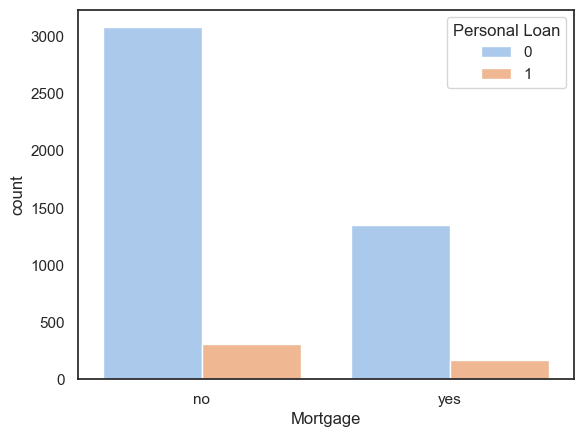

In [78]:
sns.barplot(data=mortgage_personal_loan_group, x='Mortgage', y="count", hue='Personal Loan')

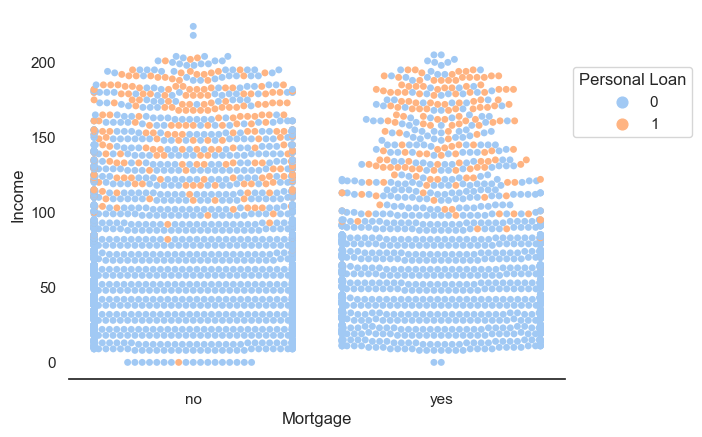

In [79]:
plot_swarmplot('Mortgage','Income','Personal Loan', mortgage_personal_loan, "Personal Loan")

Summary/Observation: No unexpected observations. 

### Anyalse Personal Loan based on InternetBanking

In [80]:
InternetBanking_personal_loan = df_data.copy()
InternetBanking_personal_loan.loc[InternetBanking_personal_loan['InternetBanking'] == 1, 'InternetBanking'] = 'yes'
InternetBanking_personal_loan.loc[InternetBanking_personal_loan['InternetBanking'] == 0, 'InternetBanking'] = 'no'
InternetBanking_personal_loan['count'] = InternetBanking_personal_loan['Personal Loan']
InternetBanking_personal_loan_group = InternetBanking_personal_loan.groupby(['InternetBanking', 'Personal Loan'],as_index=False)['count'].count()

<AxesSubplot:xlabel='InternetBanking', ylabel='count'>

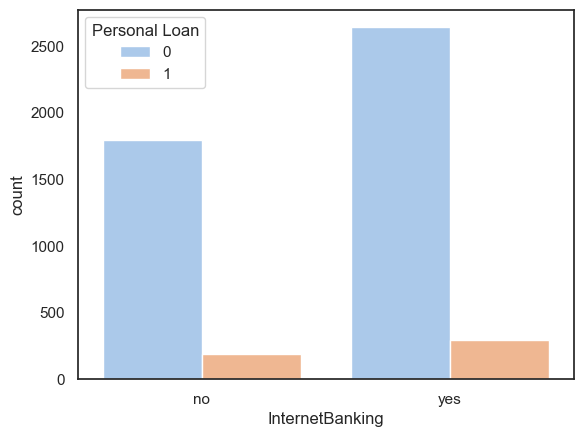

In [81]:
sns.barplot(data=InternetBanking_personal_loan_group, x='InternetBanking', y="count", hue='Personal Loan')

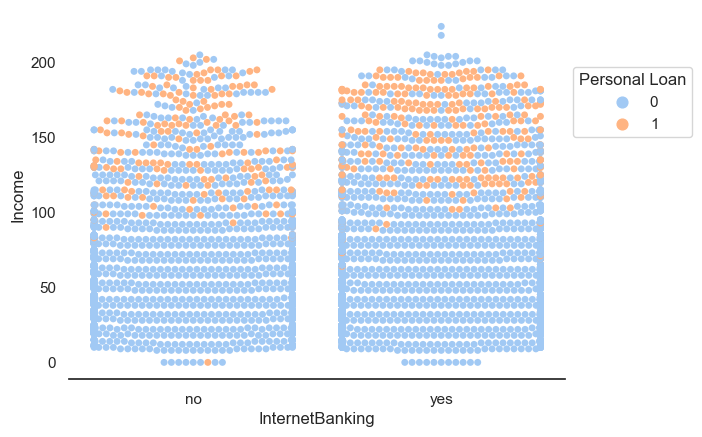

In [83]:
plot_swarmplot('InternetBanking','Income','Personal Loan', InternetBanking_personal_loan, "Personal Loan")

Summary/Observation: No unexpected observations.

### Anyalse income based on education

In [84]:
income_education = df_data.copy()
income_education.loc[income_education['Education'] == 0, 'Education'] = 'Undergrad'
income_education.loc[income_education['Education'] == 1, 'Education'] = 'Graduate'
income_education.loc[income_education['Education'] == 2, 'Education'] = 'Advanced Degree'
income_education['count'] = df_data['Income']

bins = [0,10,20,50,75,100,125,150,200,225,250]
labels = ['10','20', '50','75','100','125', '150','200','225', '250']
income_education['binned_income'] = pd.cut(income_education['Income'], bins=bins, labels=labels)
                 
income_education = income_education.groupby(['binned_income', 'Education'],as_index=False)['count'].count()
income_education['binned_income'] = income_education['binned_income'].astype('int')

<AxesSubplot:xlabel='binned_income', ylabel='count'>

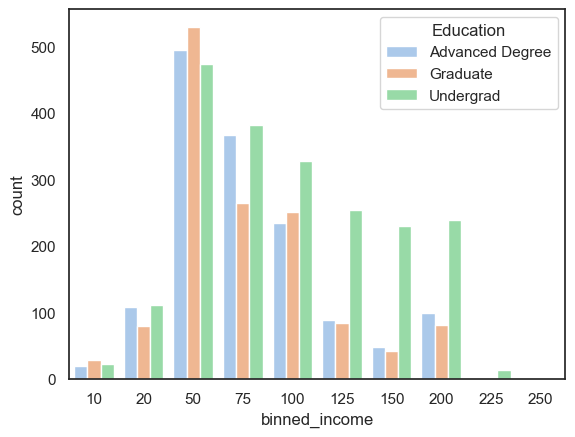

In [85]:
sns.barplot(data=income_education, x='binned_income', y='count',hue='Education')

Summary/Observation: Undergraduates earn more income above 75K - 100k instead of graduated and advanced graduates above this income.

### Analysing familiy size in compare to income and personal loan

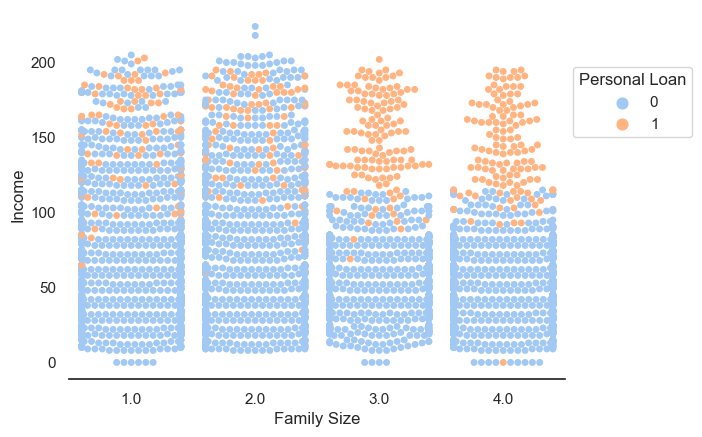

In [86]:
plot_swarmplot('Family Size','Income','Personal Loan', df_data, "Personal Loan")

Summary/Observation: Families with a size of 3 or 4 people have more the tendency to take a loan

### Anyalse personal loan based on the income

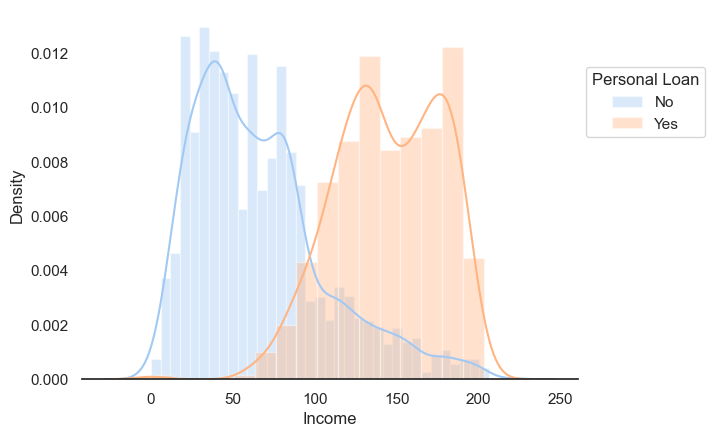

In [87]:
plot_despite_graph(df_data,'Personal Loan', 'Income')

Summary/Observation: People with a higherincome have more tendency for taking a loan

### Anyalse personal loan based on the mortgage

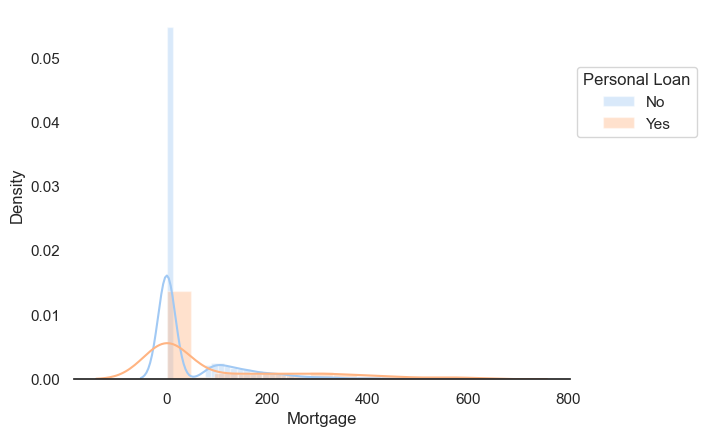

In [88]:
plot_despite_graph(df_data,'Personal Loan', 'Mortgage')

Summary/Observation: People with a mortgage have more of a tendency for taking a loan

### Anyalse personal loan based on the average spending

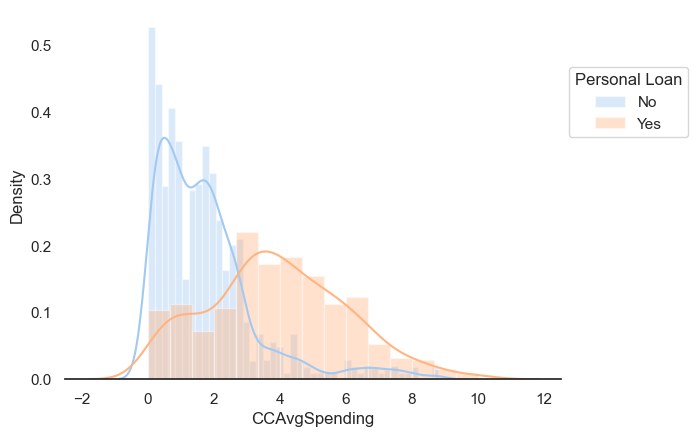

In [89]:
plot_despite_graph(df_data,'Personal Loan', 'CCAvgSpending')

Summary/Observation: People with a higher average spending have more of a tendency for taking a loan

### Checking for noise and duplicate entries in relationship to the personal loan

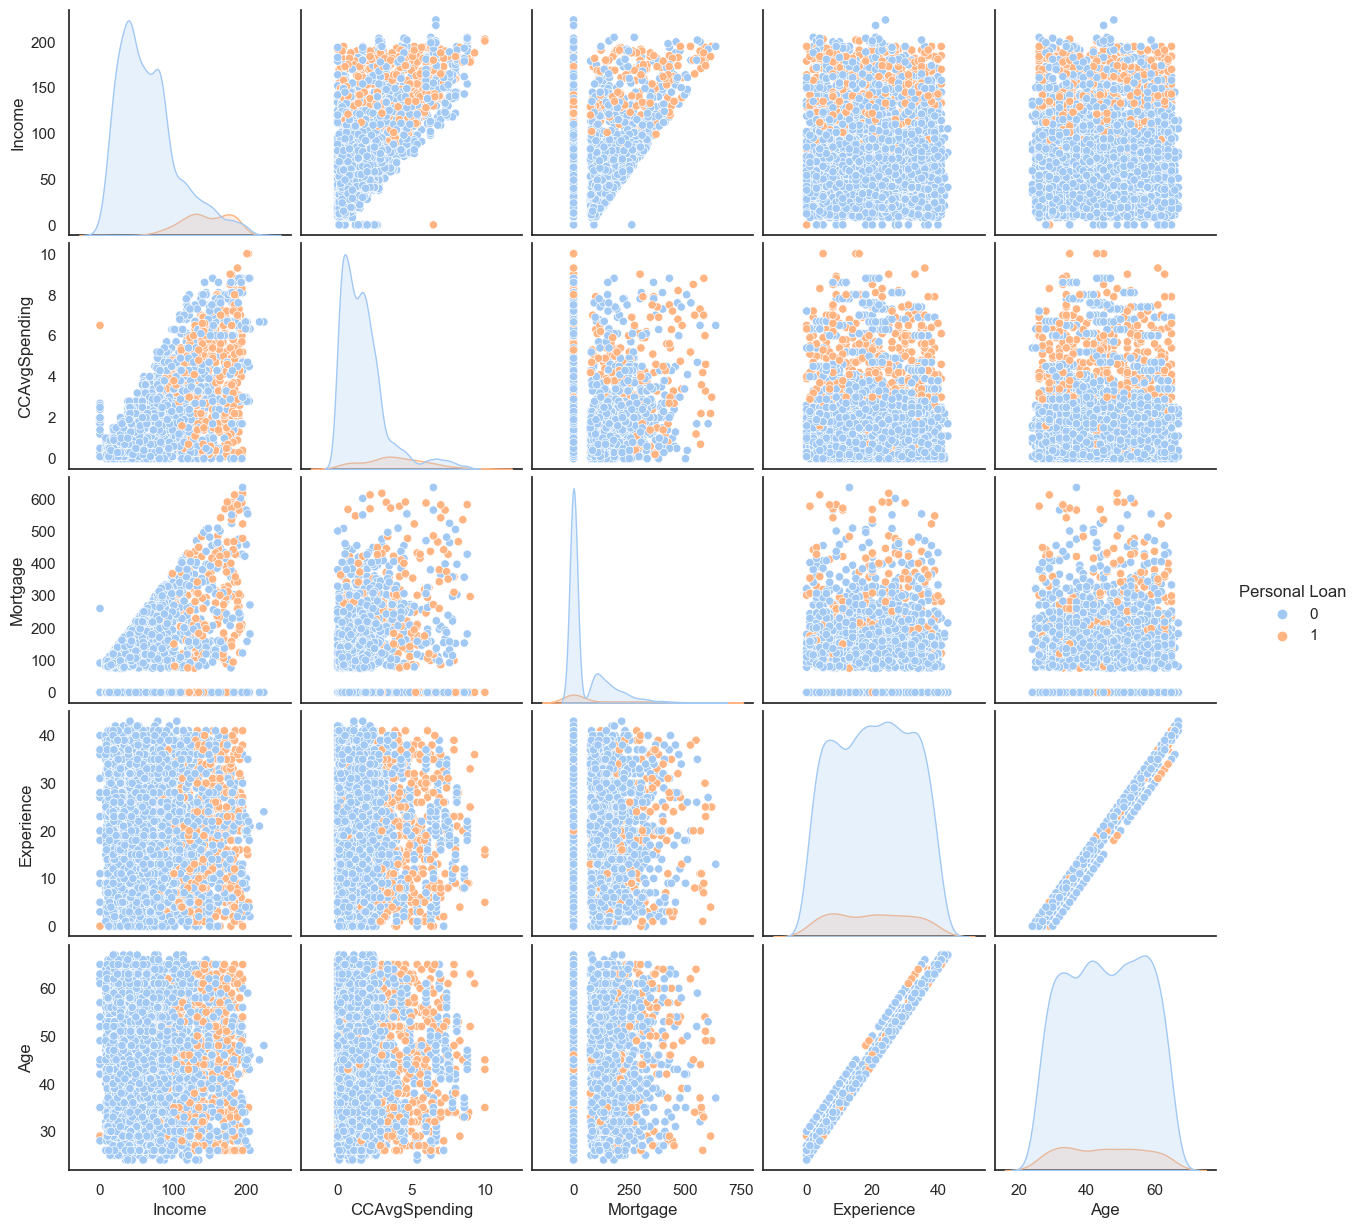

In [90]:
sns.pairplot(df_data[[ 'Income', 'CCAvgSpending', 'Mortgage', 'Experience','Age', 'Personal Loan']],hue='Personal Loan')

Summary/Observation: No outliers or unexpected noise

### Analysing loan per location

<AxesSubplot:ylabel='Location'>

<Figure size 1500x2400 with 0 Axes>

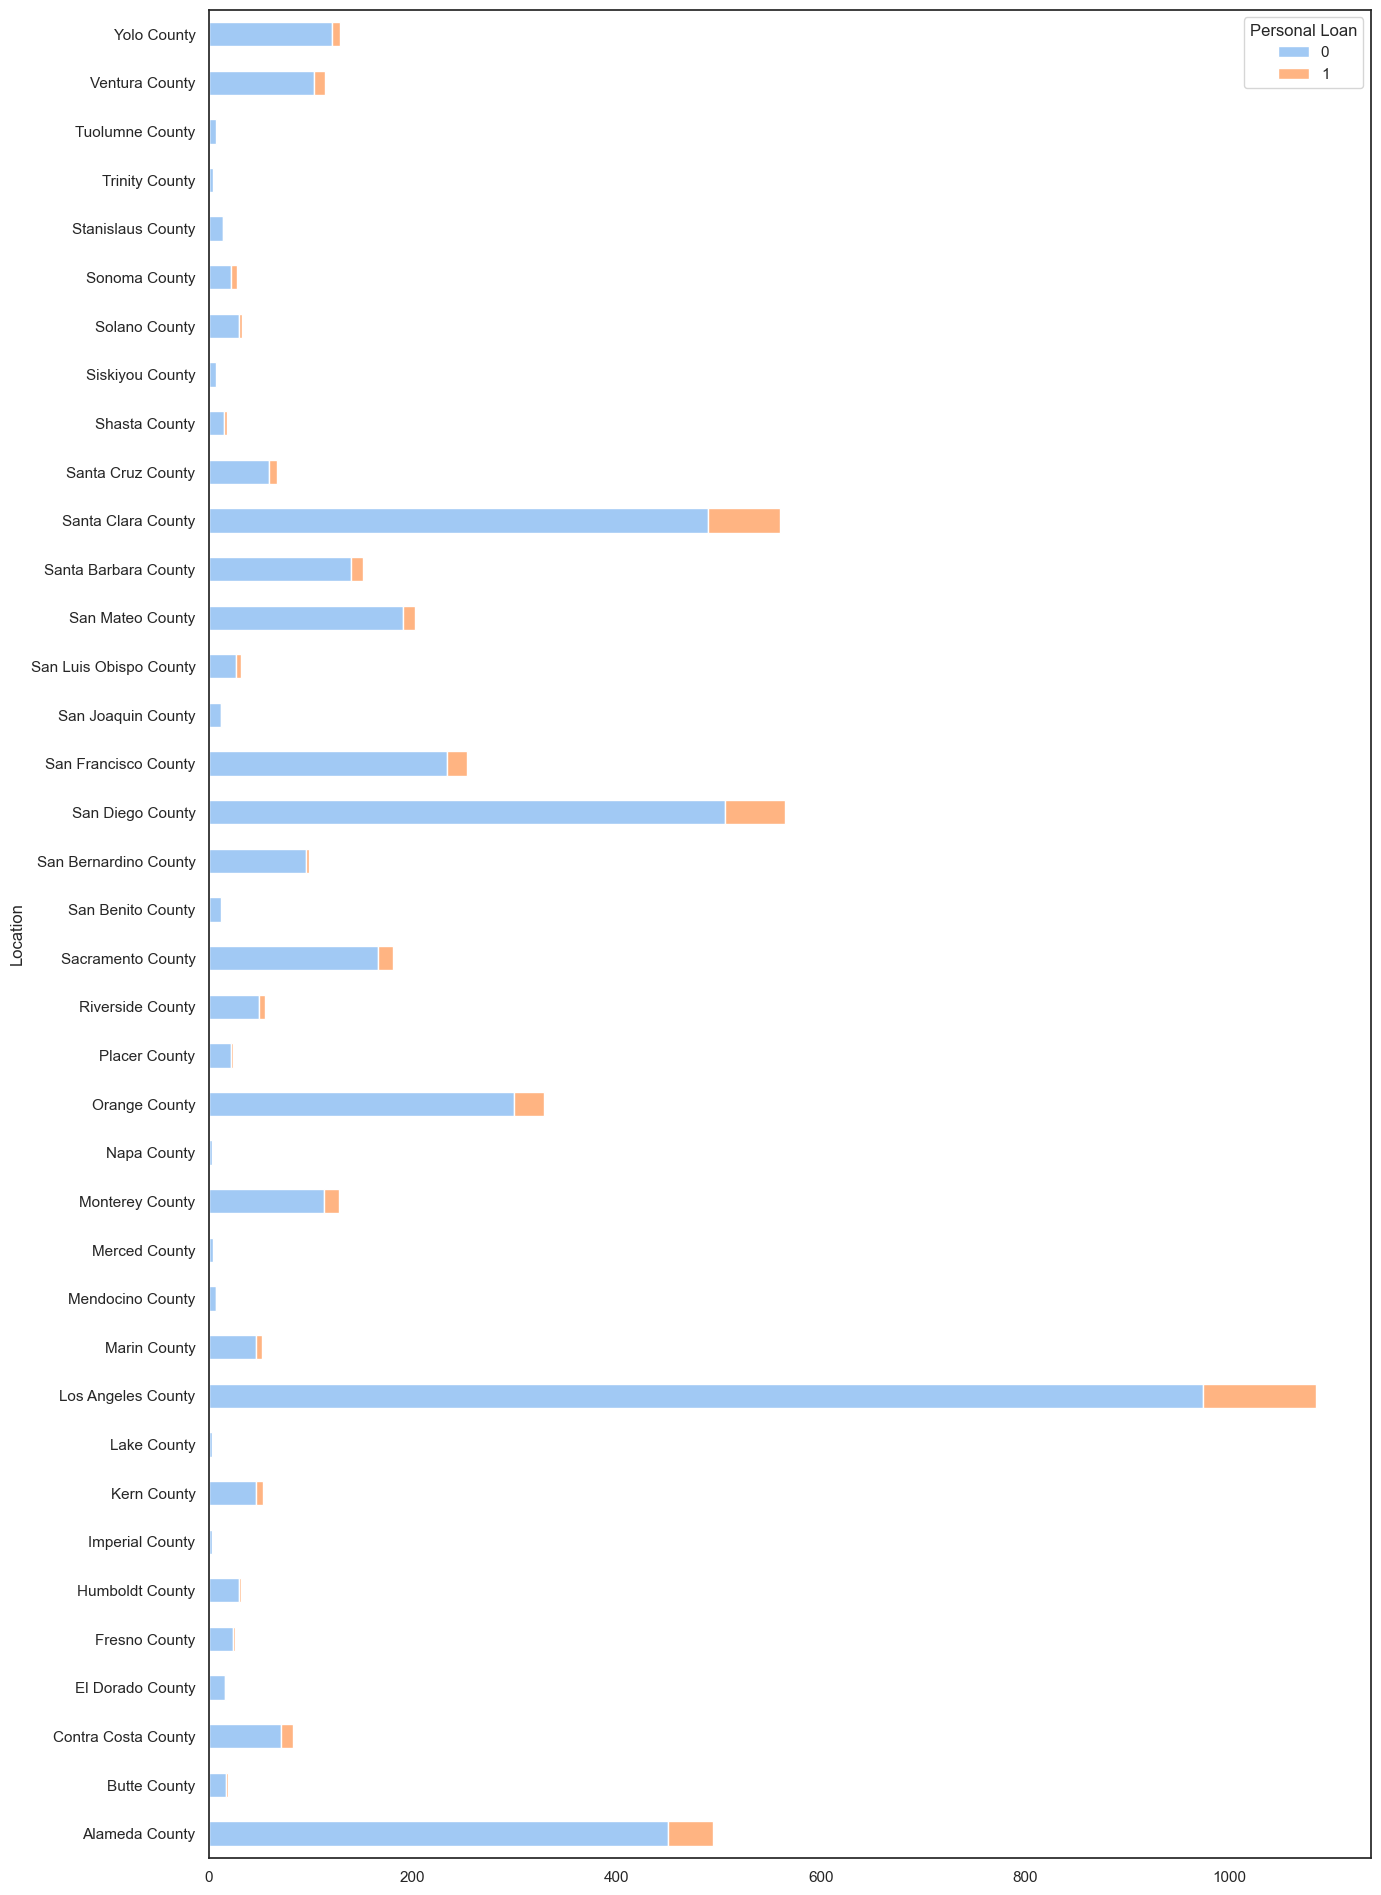

In [91]:
plt.figure(figsize=(15,24))
sns.set_palette('pastel')
pd.crosstab(index=df_data['Location'],columns=df_data['Personal Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

Summary/Observation: At some locations the possibility to take a loan is higher